# Deep Learning Brasilia - Lição 3


Esqueleto de treino de modelo para a competição Dog Breed Identification: https://www.kaggle.com/c/dog-breed-identification

## Treino do Modelo

In [1]:
# Setting AutoReload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os
BASE_DIR = '/home/paperspace/fastai/courses/dl1/'
sys.path.append(BASE_DIR)

In [3]:
import os
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

import numpy as np
import pandas as pd

sz = 224
arch = resnet50

In [4]:
DATA_DIR = os.path.join('/home','paperspace', '.kaggle', 'competitions','dog-breed-identification')
print(DATA_DIR)

/home/paperspace/.kaggle/competitions/dog-breed-identification


In [5]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
#tfms = tfms_from_model(arch, sz)
labels_csv = os.path.join(DATA_DIR, 'labels.csv')
n = len(list(open(labels_csv)))-1
val_idxs = get_cv_idxs(n)
#print(val_idxs[:10])

In [13]:
#data = ImageClassifierData.from_paths(DATA_DIR, tfms=transformations)
data = ImageClassifierData.from_csv(DATA_DIR, 'train', labels_csv, tfms=tfms, suffix='.jpg', val_idxs=val_idxs, test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 5)

epoch      trn_loss   val_loss   accuracy                   
    0      1.319953   0.622778   0.851272  
    1      0.69245    0.512264   0.864481                    
    2      0.502248   0.481863   0.865949                    
    3      0.396424   0.458748   0.866928                    
    4      0.350349   0.435966   0.865949                    



[array([0.43597]), 0.8659491194904201]

## Aperfeiçoamento do Modelo

Sinta-se à vontade!

In [14]:
learn.lr_find()

 77%|███████▋  | 99/128 [00:02<00:00, 42.51it/s, loss=1.15] 


learn.sched.plot_lr()dd

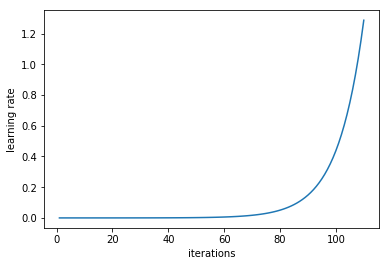

In [15]:
learn.sched.plot_lr()

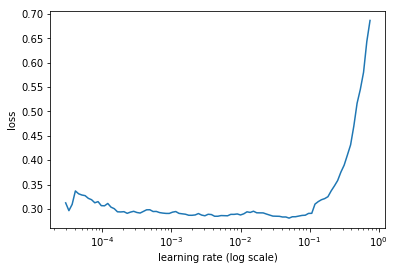

In [16]:
learn.sched.plot()

In [7]:
print(len(os.listdir(f'{DATA_DIR}/train')))
files = os.listdir(f'{DATA_DIR}/train')[:5]
files

10222


['d8275152fe9027835bec0c405d131a2b.jpg',
 '44b4684cac2f73ba81b6ed86e45244ad.jpg',
 'bc218eeb424cf93092b0a0b23035bbad.jpg',
 'eba058daca887257dc71bfd2a0267d29.jpg',
 '92d23591a857f9adb0024d587683a1cd.jpg']

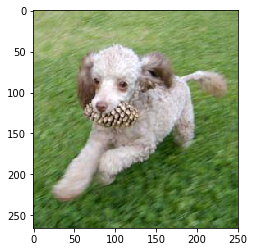

In [8]:
img = plt.imread(f'{DATA_DIR}/train/{files[4]}')
plt.imshow(img);

In [10]:
img.shape

(290, 402, 3)

In [17]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(DATA_DIR, 'train', labels_csv, tfms=tfms, suffix='.jpg', val_idxs=val_idxs, bs=bs, test_name='test')
    return data if sz > 300 else data.resize(340, 'tmp')

In [18]:
sz = 224
bs = 64
data = get_data(sz,bs)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps= 0.5)


100%|██████████| 162/162 [00:41<00:00,  3.88it/s]


In [19]:
learn.fit(0.01,7)

epoch      trn_loss   val_loss   accuracy                   
    0      1.555957   0.73342    0.836106  
    1      0.800447   0.548071   0.862524                    
    2      0.610482   0.489732   0.858121                    
    3      0.50245    0.505247   0.8591                      
    4      0.440194   0.443408   0.868885                    
    5      0.377811   0.477404   0.867417                    
    6      0.3575     0.492653   0.863992                    



[array([0.49265]), 0.8639921715114914]

In [20]:
learn.precompute=False
learn.fit(0.01, 5, cycle_len = 1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.442415   0.407176   0.873777  
    1      0.429508   0.408361   0.870352                    
    2      0.414689   0.395881   0.872798                    
    3      0.40348    0.398506   0.874266                    
    4      0.390931   0.401348   0.873288                    



[array([0.40135]), 0.8732876718160925]

In [21]:
learn.set_data(get_data(299,bs))
learn.fit(0.01, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.389884   0.391828   0.882583  
    1      0.392169   0.387046   0.881115                    
    2      0.376531   0.384187   0.881605                    



[array([0.38419]), 0.8816046958566879]

In [22]:
learn.fit(0.01, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.386782   0.384296   0.883562  
    1      0.358061   0.376663   0.883072                    
    2      0.337961   0.372463   0.886497                    
    3      0.350747   0.37377    0.882583                    
    4      0.31905    0.37355    0.88454                     
    5      0.315584   0.374283   0.885519                    
    6      0.284613   0.372116   0.88454                     



[array([0.37212]), 0.8845401175334728]

## Submissão dos resultados

Carregarmos o aruqivo de exemplo de submissão para e mostramos abaixo.

In [23]:
import pandas as pd
d=pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))
d.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
4,001a5f3114548acdefa3d4da05474c2e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333


Na função `learn.predict()` a seguir, utilizamos o parâmetro `is_test=True` para gerar as predições dos dados de teste ao invés das prediçõe dos dados de validação, o que é o padrão.

In [24]:
#log_preds = learn.predict(is_test=True)
#probs = np.exp(log_preds)
log_preds = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds[0]), axis=0)

Utilizando o Pandas, criamos um data frame com a mesma estrutura do arquivo de submissão de exemplo, utilizando as probabilidades inferidas pelo modelo nos dados de teste como dados.

In [25]:
# Cria data frame para submissão, com as probabilidades calculadas pelo modelo
df=pd.DataFrame(
    data=probs,
    columns=d.columns[1:], # Excluir primeira coluna, que é o ID
    index=[f[5:-4] for f in data.test_dl.dataset.fnames] 
)
df.index.name = 'id'

# Salva dataframe em arquivo CSV para envio para o Kaggle
arquivo_submissao = os.path.join(DATA_DIR,'fastai_submission.csv')
df.to_csv(arquivo_submissao)

Formata comando para submissão através da ferramenta oficial do Kaggle

In [26]:
arquivo_submissao = '/home/paperspace/.kaggle/competitions/dog-breed-identification/fastai_submission.csv'
comando = f'kaggle competitions submit -c dog-breed-identification -f {arquivo_submissao} -m "Submissão de teste"'
print(comando)

kaggle competitions submit -c dog-breed-identification -f /home/paperspace/.kaggle/competitions/dog-breed-identification/fastai_submission.csv -m "Submissão de teste"


Ao executar a linha abaixo, o comando de submissão, armazenado na variável `comanndo` é executado. Este mesmo comando pode ser executado diretamente no shell do PaperSpace. Após alguns segundos, você deverá receber a mensagem "Successfully submitted to Dog Breed Identification"

In [27]:
!($comando)

Successfully submitted to Dog Breed Identification